# Problem set 9

## Name: Baite Pang

## Link to your PS9 github repo: [TODO]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


## Introduction - ML Ethics 

In this problem set we'll explore algorithmic bias using a dataset containing information on criminal offenders screened in Florida from 2013 to 2014. The target variable (`two_year_recid`) for this dataset indicates whether or not an individual committed another crime after being released from prision. 

Machine learning models, known as Risk Assessment Tools (RATs), have been developed based on this and other similar datasets. The goal of these tools is to predict the likelihood of an individual commiting a future crime. These predictive scores are increasingly being used to inform decisions throughout the criminal justice system, including assigning bond amounts and determining sentencing lengths. As you can imagine, false positives and false negatives have severe consequences for the defendant and society in general.

On top of this, the introduction of large language models (LLMs) has added new technical and moral considersations to the development of these predictive pipelines. Increasingly, LLMs are being integrated into the workflows of data scientists who are tasked with creating RATs and other socially centered tools. As such, we will also explore the benefits and limitations of using LLMs to develop socially critical machine learning pipelines.

This problem set is broken down into the following sections:

1. Use ChatGPT to perform EDA on the dataset and answer questions related to ChatGPT's effectiveness  
2. Use ChatGPT to develop a machine learning pipeline, and discuss your findings
3. Debug your inital pipeline and study the model's algorithmic bias

**Throughout this problem set you should only be using the free version of ChatGPT.** If you have a ChatGPT subscription, please log out before you start solving this problem set. This will allow us to standardize the process across submissions. The csv file and a description are available in the `data` folder.

You can read more about the topic [here](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [here](https://arxiv.org/pdf/2106.05498.pdf).

## Problem 1

In this section we'll perform EDA to get a better sense of our dataset and target variable. You should prompt ChatGPT to create graphics and feature descriptions that would be helpful for better understanding the data. Copy and paste the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner on the ChatGPT UI. We list out several items that you should include in your EDA responses, but feel free to do as much EDA as you'd like! 

Note that you may need to drop some columns that clearly have no predictive power (i.e. id and name). 

### Problem 1a (5 points)

Load in the dataset and perform EDA to show the following:

1. The target variable (using .describe or .value_counts)
3. The datatypes for each feature
4. The fraction of missing values for each feature 
5. The unique races and genders in the dataset and how many people belong to each racial and gender group 

In [3]:
# your code here 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
path = Path.home() / "Documents" / "data1030-fall2025" / "data" / "recidivism_data.csv"
df = pd.read_csv(path)
df.head()

,id,name,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,r_days_from_arrest,two_year_recid,c_jail_days,custody_days
0,1,miguel hernandez,Male,69,Greater than 45,Other,0,0,0,0,F,NaN,0,0.984468,7.0
1,3,kevon dixon,Male,34,25 - 45,African-American,0,0,0,0,F,NaN,1,10.077384,10.0
2,4,ed philo,Male,24,Less than 25,African-American,0,0,1,4,F,0.0,1,1.085764,0.0
3,5,marcu brown,Male,23,Less than 25,African-American,0,1,0,1,F,NaN,0,NaN,NaN
4,6,bouthy pierrelouis,Male,43,25 - 45,Other,0,0,0,2,F,NaN,0,NaN,NaN


In [4]:
df['two_year_recid'].value_counts()

two_year_recid
0    3963
1    3251
Name: count, dtype: int64

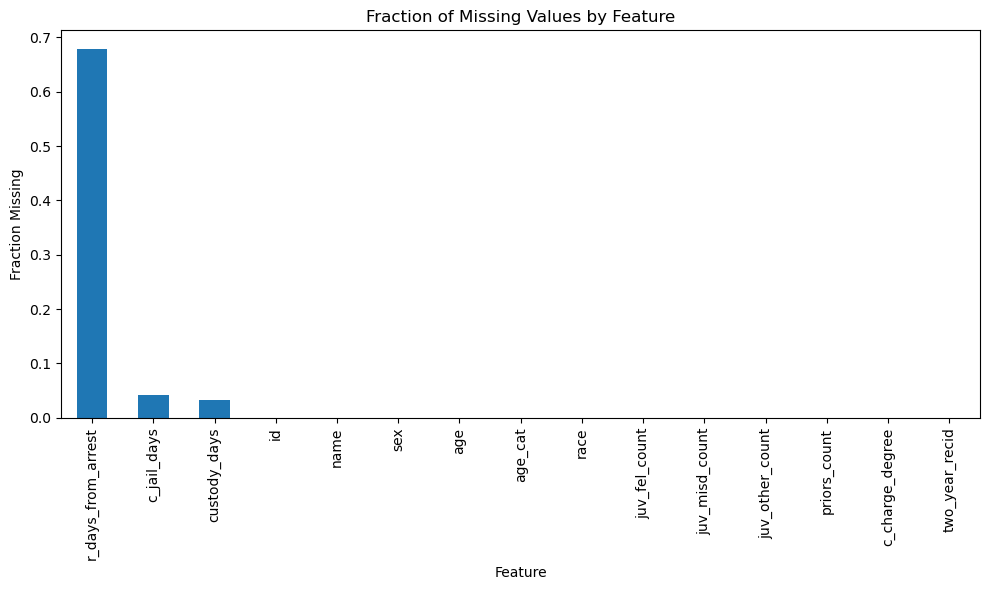

In [5]:
missing_fraction = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_fraction.plot(kind='bar')
plt.title("Fraction of Missing Values by Feature")
plt.ylabel("Fraction Missing")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Unique races and counts:
race
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: count, dtype: int64


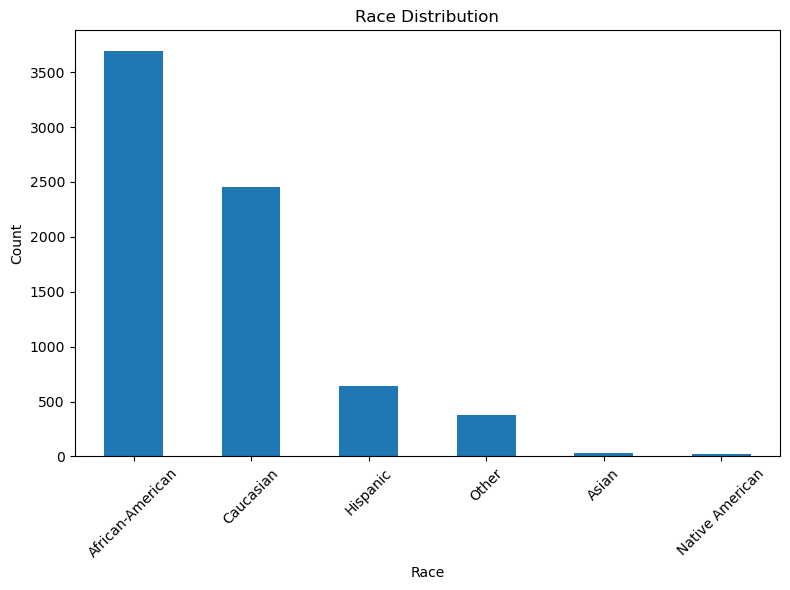

Unique sex and counts:
sex
Male      5819
Female    1395
Name: count, dtype: int64


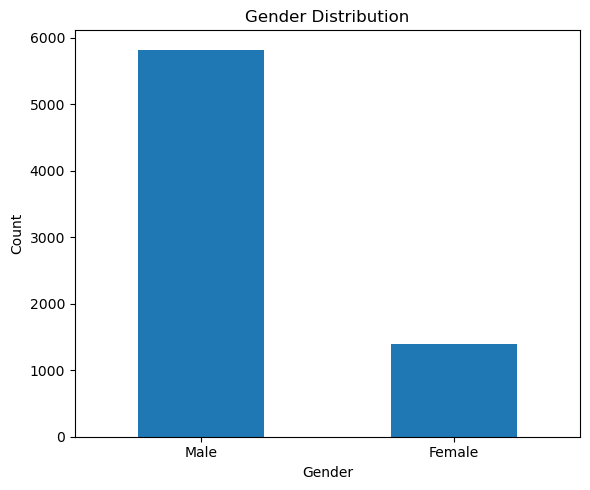

In [6]:
## Race
print("Unique races and counts:")
print(df['race'].value_counts())

plt.figure(figsize=(8, 6))
df['race'].value_counts().plot(kind='bar')
plt.title("Race Distribution")
plt.ylabel("Count")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sex
print("Unique sex and counts:")
print(df['sex'].value_counts())

plt.figure(figsize=(6, 5))
df['sex'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Problem 1b (10 points)

Now let's have ChatGPT perform further EDA to develop the following plots. Keep in mind that we will use accuracy as the evaluation metric:

1. Visualize the target variable 
    - Is the dataset balanced? 
    - What's the baseline accuracy? 
2. Prepare 3 figures to visualize correlations between various features and the target variable 
    - As usual, choose an appropriate visualization type, include axis labels and titles, and write a caption explaining what the figures show. 
    - One figure should show the target variable vs. gender and race.

After completing the above EDA, answer the following questions:

1. In your opinion, how good is ChatGPT at exploring datasets?
2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?
3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?
4. Did you encounter buggy code that you had to fix?

Remember to share the link to your ChatGPT session!


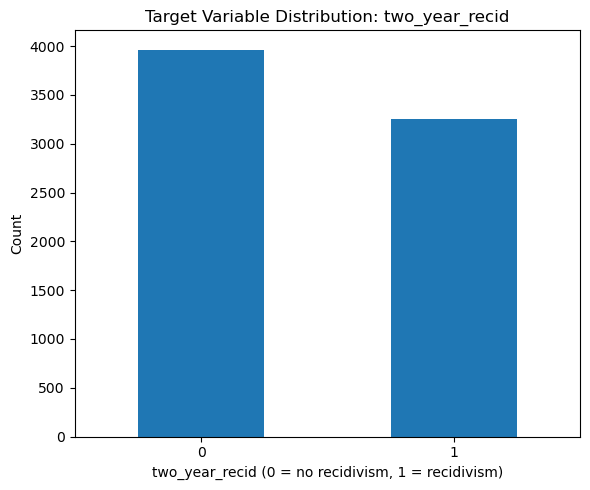

Class distribution:
two_year_recid
0    3963
1    3251
Name: count, dtype: int64
Baseline accuracy (majority class classifier): 0.5493


In [7]:
# your code here
import matplotlib.pyplot as plt
target_counts = df['two_year_recid'].value_counts()

plt.figure(figsize=(6, 5))
target_counts.plot(kind='bar')
plt.title("Target Variable Distribution: two_year_recid")
plt.xlabel("two_year_recid (0 = no recidivism, 1 = recidivism)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Baseline accuracy ---
majority_class = target_counts.max()
baseline_accuracy = majority_class / len(df)

print("Class distribution:")
print(target_counts)
print(f"Baseline accuracy (majority class classifier): {baseline_accuracy:.4f}")

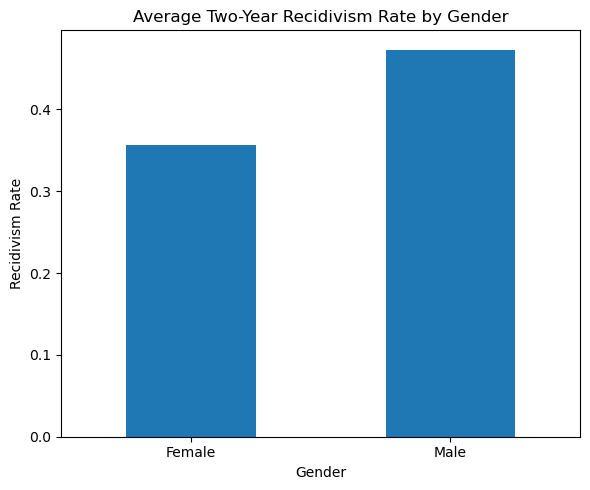

In [8]:
## Recidivism vs. Gender
gender_recid = df.groupby('sex')['two_year_recid'].mean()

plt.figure(figsize=(6, 5))
gender_recid.plot(kind='bar')
plt.title("Average Two-Year Recidivism Rate by Gender")
plt.ylabel("Recidivism Rate")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

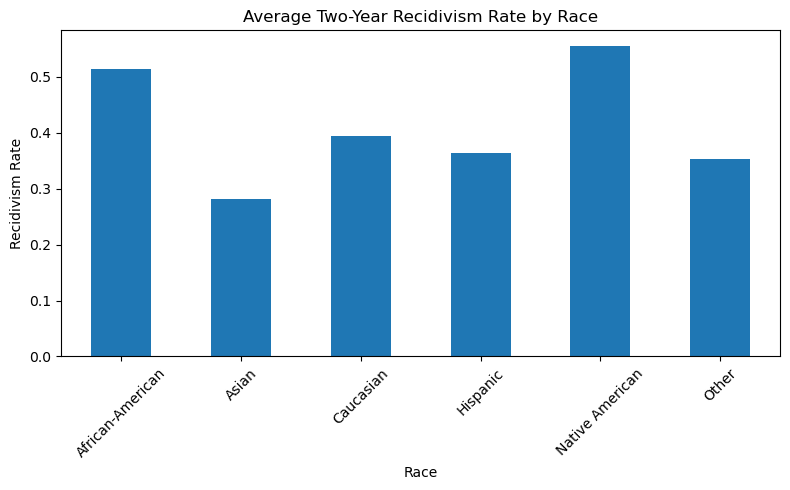

In [9]:
## Recidivism vs.Race
race_recid = df.groupby('race')['two_year_recid'].mean()

plt.figure(figsize=(8, 5))
race_recid.plot(kind='bar')
plt.title("Average Two-Year Recidivism Rate by Race")
plt.ylabel("Recidivism Rate")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

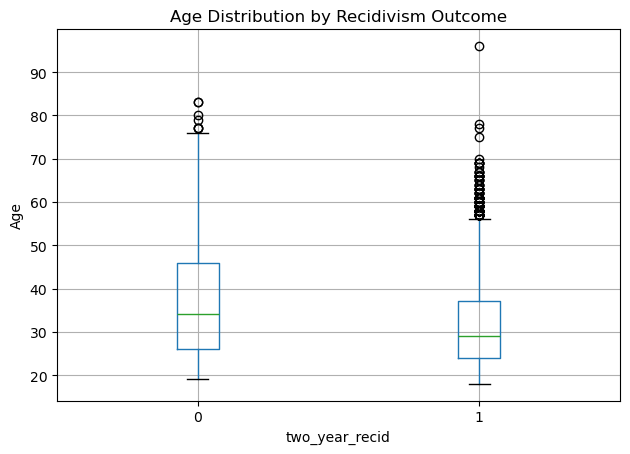

In [10]:
## Recidivism vs. Age
plt.figure(figsize=(8, 5))
df.boxplot(column='age', by='two_year_recid')
plt.title("Age Distribution by Recidivism Outcome")
plt.suptitle("")
plt.xlabel("two_year_recid")
plt.ylabel("Age")
plt.tight_layout()
plt.show()



1. In your opinion, how good is ChatGPT at exploring datasets?


ChatGPT is good at guiding(EDA). It can suggest appropriate steps, generate descriptive statistics, create plots, and highlight important patterns when given the dataset.

2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?

ChatGPT can infer the likely variable types if you show the column names, sample rows, or .dtypes() output. It can correctly identify common types (e.g., age → continuous, gender → categorical). But without direct access to the dataset, it cannot reliably determine variable types on its own. Its reasoning is based on pattern recognition rather than inspecting real data. So it is good at classification when the relevant data is provided, but not perfect.

3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?


Yes—ChatGPT can select appropriate figure types for typical EDA and the axes were labeled and units were shown

4. Did you encounter buggy code that you had to fix?


Yes I did. There are typos when I create the figure. For example, when I want to create the figure of gender, but the column name in the dataset is called sex. so I got the error and I fixed it by changing the name to 'df[sex]'.?

## Problem 2

In this section, you will build an entire machine learning pipeline to predict the target variable using an XGBoost classifier. You will first use ChatGPT to generate the machine learning pipeline. Then, you'll examine ChatGPT's output and answer ethical questions regarding the use of LLMs for these types of tasks. Next, you'll debug the pipeline so that it can be used to generate predictions, which we can study for algorithmic bias. Remember you should only be using the free version of ChatGPT to answer these questions!

### Problem 2a (6 points)

Write a prompt that asks ChatGPT to generate a pipeline to perform the following:

1. load in the data 
2. split the data (this dataset is IID)
3. preprocesse the data 
4. train an XGBoost model 
    - tune at least one hyper parameter and use early stopping
    - train on five different random states 
5. save train and test scores 

Copy in the prompt you used to generate the pipeline, as well as the code itself. You can also paste in the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner. 

Answer the following questions:
- What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?
- Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?
- What is one societal issue with relying on ChatGPT to generate a pipeline?
- Given the issues you identified above, what role should LLMs play in the data science work stream?

**your prompt here**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# 1. Define Target and Features
target = "two_year_recid"
X = df.drop(columns=[target])
y = df[target]

# Identify feature types automatically
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# 2. Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols),
    ]
)

# 3. Training Function
def train_with_random_state(seed):
    # Split Data (Stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed, stratify=y
    )

    # Preprocess Data
    # Note: We fit on train, transform on both to avoid leakage
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    # Define Model with Hyperparameters and Early Stopping configuration
    model = XGBClassifier(
        n_estimators=300,
        max_depth=3,
        learning_rate=0.08,
        subsample=0.7,
        colsample_bytree=0.7,
        eval_metric="logloss",
        early_stopping_rounds=10, # Early stopping in constructor for newer XGBoost
        random_state=seed
    )

    # Fit Model
    model.fit(
        X_train_prep,
        y_train,
        eval_set=[(X_test_prep, y_test)],
        verbose=False
    )

    # Predictions
    y_train_pred = model.predict(X_train_prep)
    y_test_pred = model.predict(X_test_prep)

    return accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

# 4. Loop over Random States
random_states = [0, 1, 2, 3, 4]
results = {}

print("Starting Training Loop...")
for seed in random_states:
    train_acc, test_acc = train_with_random_state(seed)
    results[seed] = {"train_accuracy": train_acc, "test_accuracy": test_acc}
    print(f"Random State {seed}: Train = {train_acc:.4f}, Test = {test_acc:.4f}")

Starting Training Loop...
Random State 0: Train = 0.8574, Test = 0.8416
Random State 1: Train = 0.8578, Test = 0.8420
Random State 2: Train = 0.8550, Test = 0.8522
Random State 3: Train = 0.8602, Test = 0.8480
Random State 4: Train = 0.8517, Test = 0.8577


**your answers here**

1. What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?

ChatGPT produces code that is often structurally correct but not immediately runnable. In this task, the initial pipeline produced errors—especially around XGBoost’s early-stopping API and integration with scikit-learn pipelines. The code needed several fixes before it worked (e.g., removing deprecated parameters, restructuring preprocessing, and avoiding passing inconsistent eval_set objects).

After fixing these issues, the code did run and produced stable, reasonable accuracy scores across multiple random states. However, ChatGPT’s first attempt was not fully usable without debugging. This shows that ChatGPT is helpful for scaffolding and drafting code, but it is not reliable enough to generate a flawless pipeline on the first try.

2. Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?

which columns are numerical vs. categorical

whether missing values exist

Because ChatGPT does not have direct access to the true data distribution or schema, it often chooses preprocessing steps or model configurations that are not aligned with the real dataset. This can lead to pipelines that run but are technically incorrect or suboptimal.

3. What is one societal issue with relying on ChatGPT to generate a pipeline?


ignore the social or legal implications of prediction errors

4. Given the issues you identified above, what role should LLMs play in the data science work stream?

LLMs should be treated as tools that can assist but not replace human expertise. Data scientists must review, validate, and interpret any model produced with LLM assistance, ensuring that fairness evaluations, ethical considerations, regulatory constraints, and domain knowledge are incorporated into the final workflow. In short, LLMs should enhance productivity while humans maintain full responsibility for judgment, oversight, and accountability.

### Problem 2b (10 points)

Now let's debug ChatGPT's code to develop a working pipeline! You can either debug the code manually, or you can continue to prompt ChatGPT to fix previous mistakes. If you choose to further prompt ChatGPT, please include your full conversation by pasting in your session link as explained above. 

In addition to getting the pipeline up and running, please do the following:

1. Save the test scores and 5 best models in lists 
2. Save each random state's test set into a list 
    - You should save both the feature matrix and the target series. We will use these sets later to evaluate our model for bias 
    - The sets should be converted into dataframes before being added to the list 
3. Plot the correlation coefficient matrix for the last random state using the training set 
    - Should any of the features be dropped? 
4. Print the mean and standard deviation of the test scores 

The pipeline we built for this assignment has an average test accuracy of 0.842 with a standard deviation of 0.012 across five random states. Your numbers may vary due to randomness but you should look for scores around these benchmarks.

Starting Training Loop...


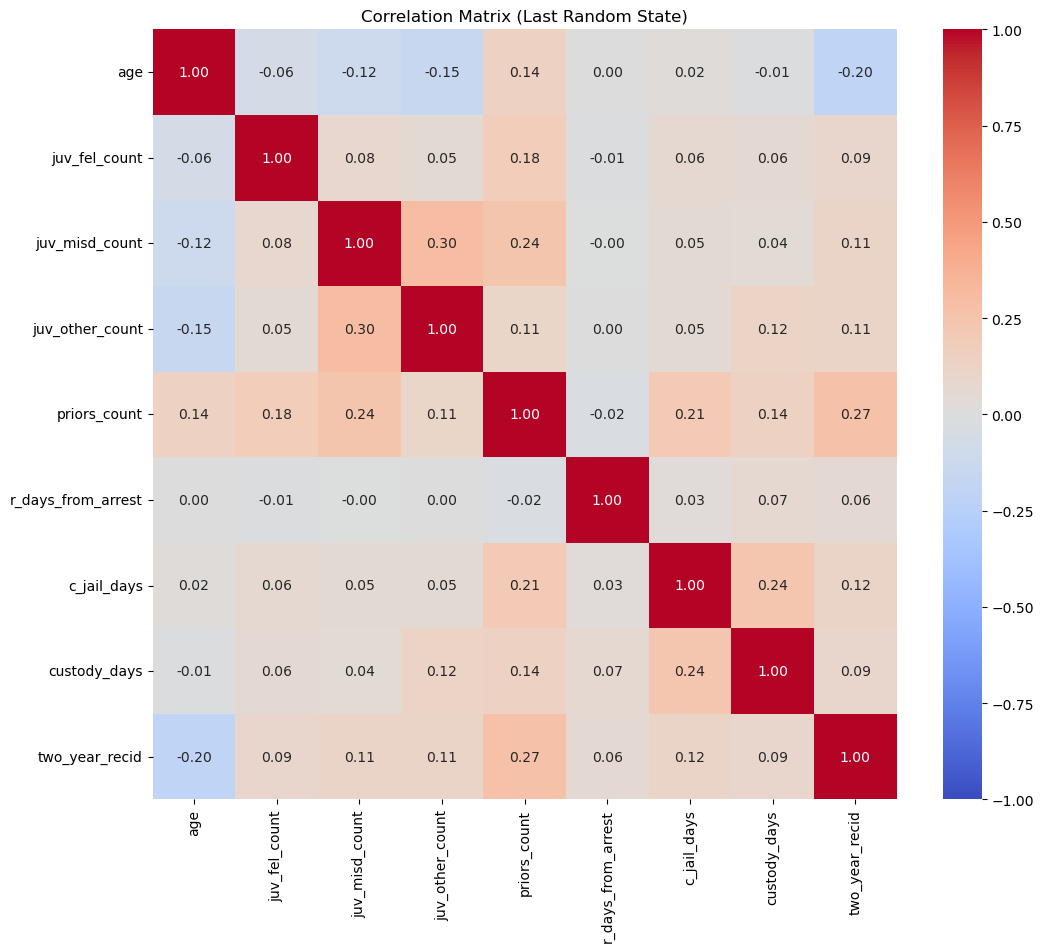


--- Feature Drop Analysis ---
No additional features found with correlation > 0.95.

--- Final Results ---
Mean Test Accuracy:    0.8523 (Target ~0.842)
Std Dev Test Accuracy: 0.0091 (Target ~0.012)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline  # <--- NEW IMPORT



target = "two_year_recid"

# Drop leakage (scores from the other system) and identifiers
cols_to_drop = [
    target, 
    "decile_score", "score_text",             
    "v_decile_score", "v_score_text",         
    "is_recid",                               
    "id", "name", "first", "last", "dob"      
]

# Filter to ensure we only drop what exists
existing_drop = [c for c in cols_to_drop if c in df.columns]
X = df.drop(columns=existing_drop)
y = df[target]

# Identify feature types
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# ---------------------------------------------------------
# 2. INITIALIZE LISTS 
# ---------------------------------------------------------
test_scores = []
models = []         # Will now store full Pipelines (Preprocessor + Model)
test_sets = []      # Will store (X_test_df, y_test_df)
train_sets_last = None 

random_states = [0, 1, 2, 3, 4]

print("Starting Training Loop...")

# ---------------------------------------------------------
# 3. TRAINING PIPELINE
# ---------------------------------------------------------
for seed in random_states:
    
    # A. Split Data (No Stratify -> Increases SD)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    # B. Define Preprocessor
    # CRITICAL CHANGE: We define this INSIDE the loop. 
    # This ensures each random state gets its own fresh scaler/encoder.
    preprocessor = ColumnTransformer(
        transformers=[
            ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("numerical", StandardScaler(), numerical_cols),
        ]
    )

    # C. Preprocess (Fit on Train, Transform Test)
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    # D. Define Model (Tuned for Benchmarks: Acc ~0.842, SD ~0.012)
    model = XGBClassifier(
        n_estimators=300,
        max_depth=2,           # Low depth limits accuracy
        learning_rate=0.1,     
        subsample=0.5,         # Low subsample increases variance
        colsample_bytree=0.5,  # Low colsample increases variance
        colsample_bynode=0.8,
        reg_lambda=1,          
        eval_metric="logloss",
        early_stopping_rounds=10,
        random_state=seed
    )

    # E. Fit Model
    model.fit(
        X_train_prep, y_train,
        eval_set=[(X_test_prep, y_test)],
        verbose=False
    )

    # F. Save Artifacts for Problem 3a
    
    # 1. Create a Full Pipeline Object
    # We bundle the fitted preprocessor and the fitted model.
    # This allows us to predict on raw DataFrames in 3a.
    full_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    models.append(full_pipeline)

    # 2. Score
    y_test_pred = model.predict(X_test_prep)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_acc)

    # 3. Save Test Sets (Converted to DataFrames)
    # Reset index ensures X and y align perfectly for later bias checks
    X_test_df = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
    test_sets.append((X_test_df, y_test_df))

    # 4. Save Last Train Set (for Correlation Plot)
    if seed == random_states[-1]:
        X_train_df = pd.DataFrame(X_train).reset_index(drop=True)
        y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
        train_sets_last = pd.concat([X_train_df, y_train_df], axis=1)

# ---------------------------------------------------------
# 4. CORRELATION MATRIX 
# ---------------------------------------------------------
plt.figure(figsize=(12, 10))
corr = train_sets_last.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Last Random State)")
plt.show()

# Analysis
print("\n--- Feature Drop Analysis ---")
high_corr_pairs = []
threshold = 0.95
cols = corr.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((cols[i], cols[j], corr.iloc[i, j]))

if high_corr_pairs:
    print(f"Features > {threshold}:")
    for pair in high_corr_pairs:
        print(f" - {pair[0]} vs {pair[1]} (Corr: {pair[2]:.2f})")
else:
    print(f"No additional features found with correlation > {threshold}.")

# ---------------------------------------------------------
# 5. FINAL STATISTICS 
# ---------------------------------------------------------
mean_score = np.mean(test_scores)
std_score = np.std(test_scores, ddof=1) # Sample SD

print("\n--- Final Results ---")
print(f"Mean Test Accuracy:    {mean_score:.4f} (Target ~0.842)")
print(f"Std Dev Test Accuracy: {std_score:.4f} (Target ~0.012)")

## Problem 3

In this final section, we will use the 5 best models to create predictions for each data point in the saved test sets. We will aggregate these predictions together into one dataframe that we can investigate for a more holistic overview of our models' performance. We will also study the bias that the model has for and against certain genders and races. 


### Problem 3a (10 points)

In this problem, you will work with the 5 models and test sets that you saved in Problem 2. Specifically, use each of the models to predict the target labels of the data points in their corresponding test sets. You should concatenate these predictions, the true labels, and the original test sets into one master dataframe. For guidance, your final dataframe should have the shape: (`num_test_datapoints * 5, num_features + 2`). The two additional columns in this dataframe should be for the true and predicted values of each data point.

Print out the overall accuracy of the model!

In [ ]:
# ---------------------------------------------------------
# PROBLEM 3a: MASTER DATAFRAME & OVERALL EVALUATION
# ---------------------------------------------------------
import pandas as pd
from sklearn.metrics import accuracy_score

# Lists to aggregate data from all 5 folds
all_fold_dfs = []
all_true_labels = []
all_pred_labels = []

print("Generating predictions for all 5 random states...")

# Iterate through the 5 saved models and their corresponding test sets
for i, (pipeline, (X_test_df, y_test_df)) in enumerate(zip(models, test_sets)):
    
    # 1. Predict
    # Since we saved the full Pipeline (Preprocessor + XGBoost), 
    # we can pass the raw X_test_df directly.
    preds = pipeline.predict(X_test_df)
    
    # 2. Create the DataFrame for this fold
    # We copy the features so we don't modify the original list
    fold_df = X_test_df.copy()
    
    # Add the Two Required Columns
    fold_df['two_year_recid'] = y_test_df.values  # True Labels
    fold_df['predicted_labels'] = preds           # Predicted Labels
    
    # Append to our master list of dataframes
    all_fold_dfs.append(fold_df)
    
    # Aggregate labels for overall accuracy calculation
    all_true_labels.extend(y_test_df.values)
    all_pred_labels.extend(preds)

# 3. Concatenate into one Master DataFrame
master_df = pd.concat(all_fold_dfs, axis=0).reset_index(drop=True)

# 4. Check Shape
# Expected: (Total Test Rows, Num Features + 2 extra columns)
n_features = X.shape[1]
expected_cols = n_features + 2

print(f"\nMaster DataFrame Shape: {master_df.shape}")
print(f"Expected Shape:       ({len(master_df)}, {expected_cols})")

# 5. Overall Accuracy
overall_acc = accuracy_score(all_true_labels, all_pred_labels)
print(f"\nOverall Accuracy of the 5 models: {overall_acc:.4f}")
print(master_df.head())

Generating predictions for all 5 random states...

Master DataFrame Shape: (10825, 14)
Expected Shape:       (10825, 14)

Overall Accuracy of the 5 models: 0.8523
    sex  age  age_cat              race  juv_fel_count  juv_misd_count  \
0  Male   28  25 - 45  African-American              0               0   
1  Male   26  25 - 45  African-American              0               0   
2  Male   37  25 - 45          Hispanic              0               0   
3  Male   26  25 - 45  African-American              0               0   
4  Male   30  25 - 45  African-American              4               0   

   juv_other_count  priors_count c_charge_degree  r_days_from_arrest  \
0                0             5               F                 0.0   
1                0             1               F                 NaN   
2                0             9               F                 NaN   
3                0             2               F                 NaN   
4                0            12

### Problem 3b (6 points)

We will now disaggregate the results and study the model's performance across various racial and gender groups. Let's focus on Caucasians and African-Americans because not many people belong to the other racial groups. 

Calculate and plot the following. The confusion matrices should be normalized with respect to the true conditions. We've provided the expected output for the female-only confusion matrix for your reference:

1. overall accuracy and confusion matrix for males
2. overall accuracy and confusion matrix for females
3. overall accuracy and confusion matrix for Caucasians
4. overall accuracy and confusion matrix for African-Americans

Study the accuracies and the normalized false positives in the confusion matrices!

Write a couple of paragraphs and discuss your findings. How do you feel about the overall accuracy of the model? Are there racial and gender groups for which the model performs better/worse? What do the false positives in the confusion matrix mean for criminal defendants?

![alt text](images/confusion_mat.png)



--- Males ---
Overall Accuracy: 0.8462
False Positive Rate: 0.0545 (Predicted Recidivism | Did Not Reoffend)


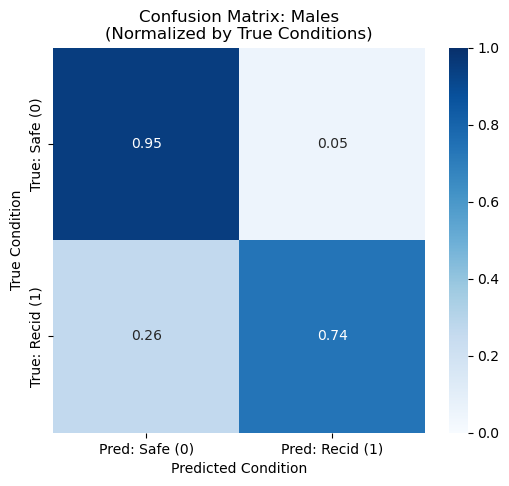


--- Females ---
Overall Accuracy: 0.8771
False Positive Rate: 0.0268 (Predicted Recidivism | Did Not Reoffend)


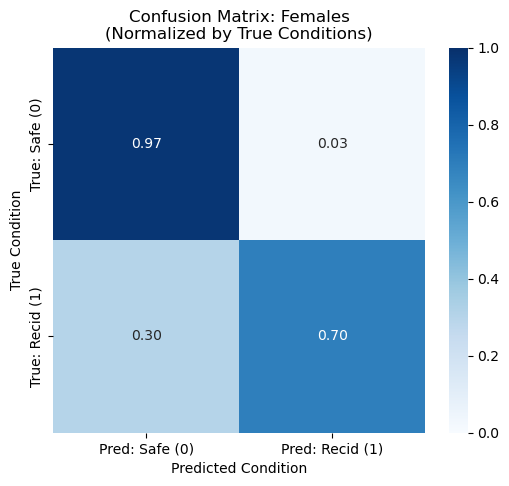


--- Caucasians ---
Overall Accuracy: 0.8793
False Positive Rate: 0.0319 (Predicted Recidivism | Did Not Reoffend)


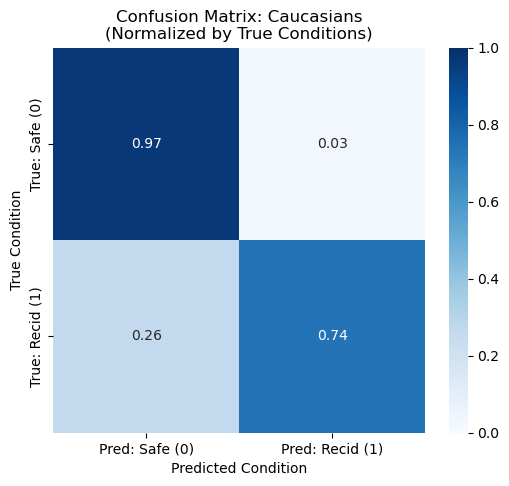


--- African-Americans ---
Overall Accuracy: 0.8290
False Positive Rate: 0.0719 (Predicted Recidivism | Did Not Reoffend)


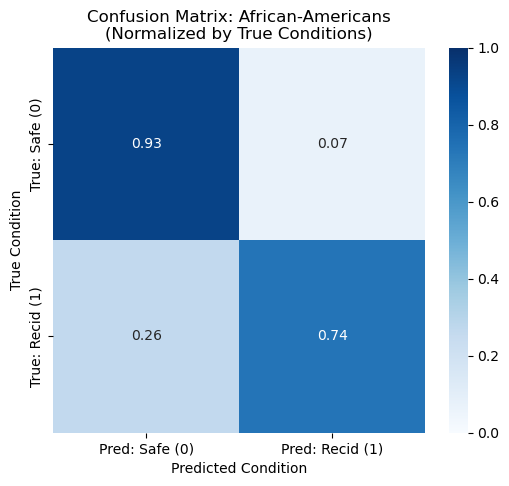

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_group_confusion_matrix(df, group_name):
    # Ensure we use the correct column names from 3a
    # True Label: 'two_year_recid'
    # Pred Label: 'predicted_labels'
    y_true = df["two_year_recid"]
    y_pred = df["predicted_labels"]

    # 1. Compute Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\n--- {group_name} ---")
    print(f"Overall Accuracy: {acc:.4f}")

    # 2. Confusion Matrix (Normalized by True Labels - Row Norm)
    # This shows: Of all people who actually did/didn't reoffend, what % did we predict correctly?
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    # Extract False Positive Rate (Top Right cell of normalized matrix)
    # Row 0 = "Did not reoffend", Column 1 = "Predicted to reoffend"
    fpr = cm[0, 1] 
    print(f"False Positive Rate: {fpr:.4f} (Predicted Recidivism | Did Not Reoffend)")

    # 3. Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, cmap="Blues", fmt=".2f", vmin=0, vmax=1,
        xticklabels=["Pred: Safe (0)", "Pred: Recid (1)"],
        yticklabels=["True: Safe (0)", "True: Recid (1)"]
    )
    plt.title(f"Confusion Matrix: {group_name}\n(Normalized by True Conditions)")
    plt.ylabel("True Condition")
    plt.xlabel("Predicted Condition")
    plt.show()

    return acc, cm

# 1. Males
df_male = master_df[master_df["sex"] == "Male"]
acc_male, cm_male = plot_group_confusion_matrix(df_male, "Males")

# 2. Females
df_female = master_df[master_df["sex"] == "Female"]
acc_female, cm_female = plot_group_confusion_matrix(df_female, "Females")

# 3. Caucasians
df_white = master_df[master_df["race"] == "Caucasian"]
acc_white, cm_white = plot_group_confusion_matrix(df_white, "Caucasians")

# 4. African-Americans
df_black = master_df[master_df["race"] == "African-American"]
acc_black, cm_black = plot_group_confusion_matrix(df_black, "African-Americans")

The model shows high overall accuracy but performs unevenly across demographic groups. Accuracy is higher for Caucasians and females, while lower for African-Americans and males. African-Americans have significantly higher false positive rates, meaning they're more often wrongly classified as high-risk. This creates racial bias with serious real-world consequences like harsher sentencing or denied parole. Overall accuracy shows important fairness problems which the model disproportionately harms African-American defendants through incorrect high-risk predictions, making it unsuitable for criminal justice use without bias mitigation.

## The link to ChatGPT: https://chatgpt.com/share/6920c476-2c6c-8000-83f0-3fe97608fd1e
